# Kaglle: Pima Indian Diabetes Database 
## Previsão de Machine Learning no desenvolvimento da Diabetes 




### ETAPA 1 — Entendimento e Tratamento dos Dados
Objetivo: preparar os dados corretamente para alimentar o modelo de ML.

**Detalhes sobre o banco de dados:**
- Pima Indian Diabetes Database - fonte: Kaggle (https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)
- Este dataset possui 768 registros válidos de mulheres com pelo menos 21 anos de idade e ascendência "Pima Indian".
- Origem: O dataset foi coletado pelo National Institute of Diabetes and Digestive and Kidney Diseases dos EUA.
- População estudada: Mulheres Pima de pelo menos 21 anos de idade, que vivem no estado do Arizona.
- Motivo do estudo: O povo Pima tem uma das maiores taxas conhecidas de diabetes tipo 2 no mundo, o que motivou diversos estudos clínicos e epidemiológicos.



#### 1.1 Definição do problema


**O que estou tentando prever ou classificar?**

A possibilidade de diabetes (ou alta probabilidade de desenvolvimento) em mulheres de acordo com a interação entre os seguintes fatores de saúde/ambientais:

```- Coluna                        Descrição
- Pregnancies                   Número de vezes que a paciente já esteve grávida.
- Glucose	                Nível de glicose no plasma, em jejum (mg/dL).
- BloodPressure	                Pressão arterial diastólica (mm Hg).
- SkinThickness	                Espessura da dobra cutânea do tríceps (em mm) — um indicativo de gordura subcutânea.
- Insulin	                Nível sérico de insulina 2 horas após ingestão de glicose (μU/mL).
- BMI	                        Índice de Massa Corporal (peso em kg dividido pelo quadrado da altura em metros).
- DiabetesPedigreeFunction      Função de histórico familiar de diabetes — quanto maior, maior a propensão genética.
- Age	                        Idade da paciente (em anos).
- Outcome	                Resultado: 1 se a paciente tem diabetes, 0 se não tem. (essa é a variável alvo).```

- Variável alvo (y): Outcome - 1 para diabetes, 0 para não diabetes.

#### Qual o impacto prático desta previsão? 

- Este estudo tem por objetivo o aprendizado de técnicas de tratamento de dados, Machine Learning e Deploy do modelo em Flask e HTML; 
- Pode servir como indicador de parâmetros de saúde a serem observados para evitar o surgimento da diabetes;
- Pode conscientizar usários deste sistema preditivo, para que através do resultado da previsão, busquem informações médicas sobre seu estado de saúde. 

#### 1.2 Coleta de dados:

In [1]:
import sklearn
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
arquivo = pd.read_csv('C:/Projetos/Python/Projetos_IA/01_Modelos_Básicos/Diabetes/dados/diabetes.csv')

#### 1.3 Analise dos dados (exploração)
- Ver tipos de variáveis (numéricas, categóricas)
- Procurar valores faltantes, duplicados
- Ver distribuição, correlações


In [3]:
#Linhas e colulas:
arquivo.shape

(768, 9)

In [4]:
#Amostra cabeçalho do arquivo
arquivo.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Amostra de dados - tail = cauda = final do arquivo
arquivo.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
#Info (procurando por valores em brancos ou nulos)
arquivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#Conferindo...
arquivo.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Análise de dados zerados
Abaixo mostra quantos zeros há em cada coluna. Apesar de não ter encontrado dados nulos, neste caso, eles vem mascarados em forma de resultado "zero". 
Não faz sentido ter glicose zero, pressão zero, gordura corporal zero, insulina zero e índice de gordura corporal zero. 

In [8]:
# Mostra quantos zeros há em cada coluna. Apesar de não ter encontrado dados nulos, neste caso, eles vem mascarados em forma de resultado "zero". 
# Não faz sentido ter glicose zero, pressão zero, gordura corporal zero, insulina zero e índice de gordura corporal zero. 

colunas_com_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for coluna in colunas_com_zero:
    total_zeros = (arquivo[coluna] == 0).sum()
    print(f'{coluna}: {total_zeros} zeros')

Glucose: 5 zeros
BloodPressure: 35 zeros
SkinThickness: 227 zeros
Insulin: 374 zeros
BMI: 11 zeros


In [9]:
# Cria uma máscara booleana onde cada linha é True se tiver pelo menos um zero
mascara_zeros = (arquivo[colunas_com_zero] == 0).any(axis=1)

# Conta quantas linhas têm ao menos um zero
total_linhas_com_zero = mascara_zeros.sum()

print(f"Total de linhas com pelo menos um zero em {colunas_com_zero}: {total_linhas_com_zero}")


Total de linhas com pelo menos um zero em ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']: 376


##### Observações importantes:
Muitos valores "0" em colunas como Glucose, BloodPressure, BMI, Insulin, etc., são biologicamente impossíveis. Eles representam dados ausentes.

Escolher estratégia a adotar:
- Tratar esses zeros como NaN, e aplicar uma estratégia de imputação (como média, mediana ou KNN Imputer);
- **Eliminar os registros com zero;** 
- Estratégia mista, eliminando registros de algumas variáveis e colocando a mediana em outros, por exemplo.

A coluna DiabetesPedigreeFunction, apesar de altamente preditora, não faz sentido para o usuário final, visto que é uma variável específica criada
para o estudo de caso desta base de dados. Nos casos reais os médicos não calculam essa função. Eles apenas perguntam sobre parentes e ascendentes
próximos com diabetes. Sendo assim, devemos excluir esta coluna, pois o usuário final não saberá preencher esta opção de maneira válida e utilitária.

#### Decisão:

Optei por eliminar os registros com valores zerados nas colunas críticas (como glicose, pressão arterial e índice de massa corporal), pois esses valores representam ausências de dados biologicamente impossíveis. Imputar tais valores com médias, medianas ou mesmo algoritmos preditivos poderia introduzir distorções estatísticas ou reforçar padrões existentes, criando viés de confirmação. Embora essa decisão reduza substancialmente o tamanho da base de dados, ela evita adulterações artificiais nos dados e será justificada se o modelo treinado demonstrar boa capacidade de generalização com os registros restantes.


In [10]:
# Cria novo DataFrame sem linhas com zero em nenhuma dessas colunas
# Como temos um total de 768 registros e 376 possuem os zeros indesejáveis, o novo arquivo terá 392 registros (51% do tamanho original)
novo_arquivo = arquivo.loc[(arquivo[colunas_com_zero] != 0).all(axis=1)].copy()

In [11]:
# Eliminando a coluna DiabetesPedigreeFunction em ambos os arquivos para comparações de correlação (mais abaixo)

arquivo = arquivo.drop('DiabetesPedigreeFunction', axis=1)
novo_arquivo = novo_arquivo.drop('DiabetesPedigreeFunction', axis=1)

In [12]:
# Informações do novo arquivo. Reduziu praticamente pela metade o número de registros
novo_arquivo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 3 to 765
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    392 non-null    int64  
 1   Glucose        392 non-null    int64  
 2   BloodPressure  392 non-null    int64  
 3   SkinThickness  392 non-null    int64  
 4   Insulin        392 non-null    int64  
 5   BMI            392 non-null    float64
 6   Age            392 non-null    int64  
 7   Outcome        392 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 27.6 KB


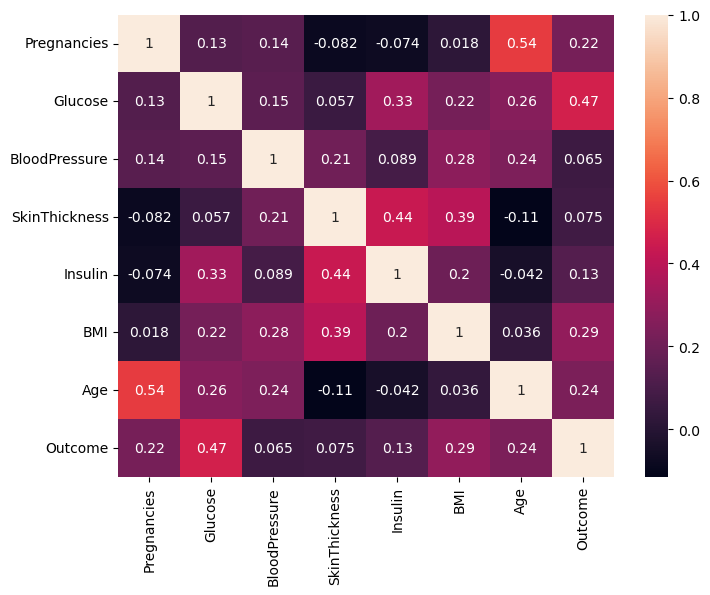

In [13]:
# Mapa de Correlação dos dados integrais (mantendo registros zerados)
plt.figure(figsize = (8,6))
corr = arquivo.corr()
sns.heatmap(corr, annot = True);

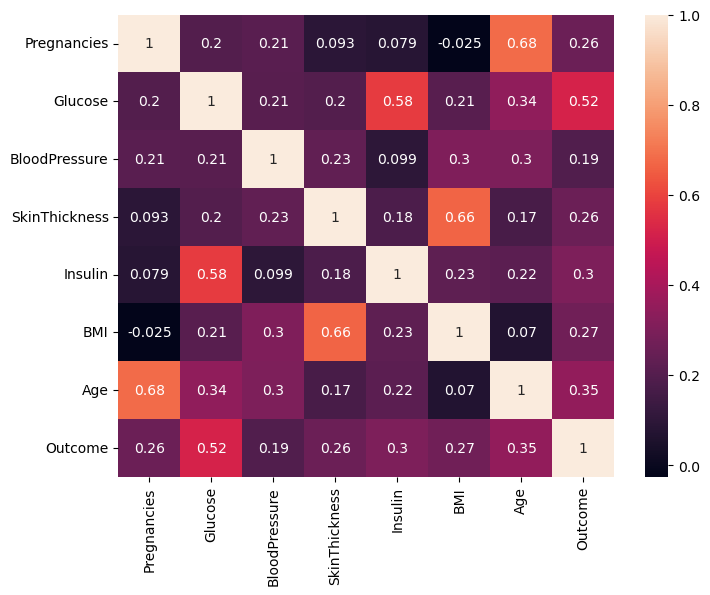

In [14]:
# Mapa de Correlação dos novos dados, excluindo linhas com zero em alguma das colunas 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'
plt.figure(figsize = (8,6))
corr = novo_arquivo.corr()
sns.heatmap(corr, annot = True);

#### Comparativo entre os dois heatmaps (com zeros x sem zeros)

- Glucose: 0.47 x 0.52 - Aumentou. agora o modelo verá melhor a relação glicose/diabetes.  
- Insulin: 0.13 x 0.30 - Mais que dobrou. Evidência de que os zeros estavam distorcendo a informação real.  
- SkinThickness: 0.075 x 0.26 - Aumentou bastante. Zeros estavam mascarando correlações.  
- BMI: 0.29 x 0.27 - Pouca variação. Sinal de estabilidade.  
- BloodPressure: 0.065 x 0.19 - Triplicou a correlação.  
- Pregnancies: 0.22 x 0.26 - Leve aumento.  
- Age: 0.24 x 0.35 - Relevância subestimada antes.  

##### Conclusão: manter os zeros distorce significativamente as correlações reais.

#### O dataset com dados limpos:
- Mostra relações mais fortes com a variável alvo.
- Reduz o ruído estatístico introduzido por zeros inválidos.
- É muito mais adequado para treinamento de um modelo confiável.

#### Reflexão:
O segundo gráfico comprova a intuição inicial:
“Melhor treinar com menos dados, mas com dados limpos, do que com mais linhas cheias de ruído.”

##### O resultado é um modelo mais realista, clinicamente coerente e com maior capacidade preditiva.

#### 1.4 Pré-processamento dos dados:
- Tratar dados faltantes
- Codificar variáveis categóricas (LabelEncoder, OneHotEncoder, etc.)
- Normalizar / padronizar variáveis numéricas (com StandardScaler, por exemplo)
- Separar X (entradas) e y (alvo)

In [16]:
# Separar x e y para o modelo de regressão:
# Separar X (entradas) e y (alvo: Outcome)
X = novo_arquivo.drop(columns=['Outcome'])  # Exclui a variável alvo Outcome.
y = novo_arquivo['Outcome']

In [17]:
# Divisão em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
# imprime o shape dos datasets de treino e teste
print(f"Shape de X_treino :{X_treino.shape}\nShape de X_teste: {X_teste.shape}",
      f"\nShape de y_treino: {y_treino.shape}\nShape de y_teste: {y_teste.shape}")

Shape de X_treino :(313, 7)
Shape de X_teste: (79, 7) 
Shape de y_treino: (313,)
Shape de y_teste: (79,)


In [19]:
# Cria o padronizador
scaler = StandardScaler()

# Fit e transform somente em treino
X_treino_scaled = scaler.fit_transform(X_treino)

# Transform em teste (e em novos dados)
X_teste_scaled = scaler.transform(X_teste)

# Vide mais informações sobre o correto do uso do scaller no readme

In [20]:
X_treino_scaled

array([[-1.02718262e+00,  1.86334398e+00,  1.51359244e+00, ...,
        -5.85300013e-01,  4.66955416e-01,  3.82185098e-01],
       [-7.22078871e-02, -1.37262755e+00,  1.19953581e+00, ...,
        -7.88543839e-01, -8.15248900e-01, -8.59916471e-01],
       [ 1.51941667e+00,  9.82686032e-02,  1.35656412e+00, ...,
        -4.32867143e-01,  7.51889709e-01,  1.71983294e+00],
       ...,
       [-1.02718262e+00, -1.95910627e-01, -3.70747369e-01, ...,
         2.44612278e-01, -3.45107317e-01, -8.59916471e-01],
       [-7.22078871e-02,  2.08859943e-04,  2.29873403e+00, ...,
         6.84973902e-01,  3.43027206e+00, -8.59916471e-01],
       [ 1.83774158e+00, -3.59343532e-01,  8.85479170e-01, ...,
         1.34521872e-01,  1.39280980e-01,  4.77731373e-01]])

In [21]:
X_teste_scaled

array([[ 1.20109176e+00, -6.86209343e-01,  2.57365900e-01,
         1.01614390e+00, -4.58272621e-01,  5.66682419e-01,
         1.33764784e+00],
       [-1.02718262e+00,  1.30955184e-01,  7.28450853e-01,
         7.36249763e-01,  4.30919119e-01,  4.38461987e-01,
        -7.64370197e-01],
       [ 2.46117024e-01, -1.24188122e+00, -9.98860639e-01,
        -6.63220941e-01, -9.32508216e-01, -7.72508756e-01,
        -2.86638824e-01],
       [-1.02718262e+00,  1.27498552e+00,  4.14394218e-01,
         2.50891266e+00, -5.00615085e-01,  2.84615676e+00,
        -5.73277648e-01],
       [-1.02718262e+00,  1.89603056e+00,  1.35656412e+00,
         1.38933609e+00,  2.97146695e+00,  1.43573201e+00,
        -4.77731373e-01],
       [-7.22078871e-02, -8.82328830e-01, -1.15588896e+00,
         4.56355623e-01, -3.73587694e-01, -1.21415691e+00,
         7.64370197e-01],
       [-7.08857709e-01, -1.69949336e+00, -1.78400223e+00,
        -1.03641313e+00, -7.03858912e-01, -1.82676564e+00,
        -8.5991647

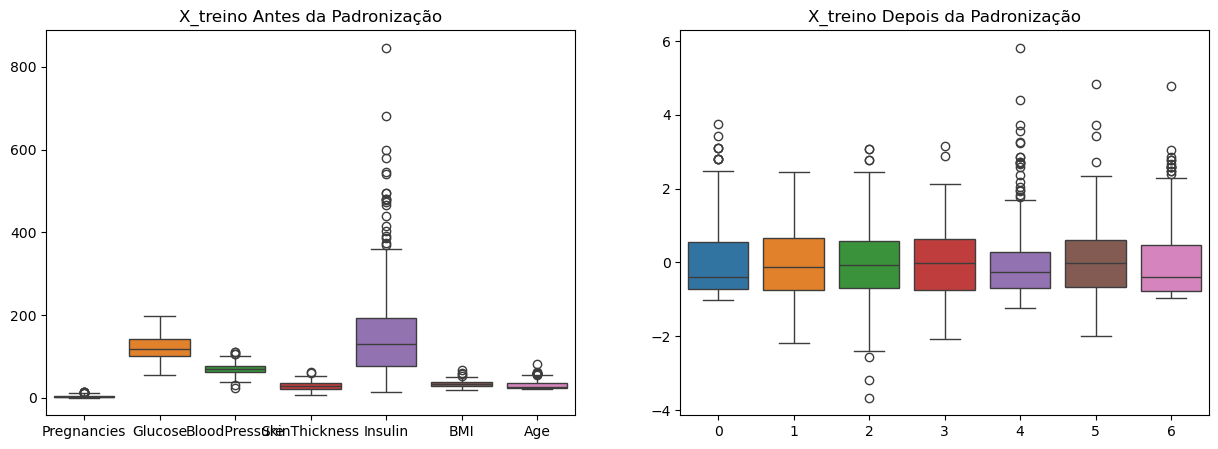

In [22]:
# Cria uma figura e um conjunto de subplots.
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

# Primeiro subplot para X_train antes da padronização
sns.boxplot(data = X_treino, ax = ax[0])
ax[0].set_title('X_treino Antes da Padronização')

# Segundo subplot para X_treino após a padronização
sns.boxplot(data = X_treino_scaled, ax = ax[1])
ax[1].set_title('X_treino Depois da Padronização')

plt.show()

### ETAPA 2 - Criar e treinar o modelo de ML

Objetivo: criar o modelo, treinar, fazer previsão, melhorar o modelo... salvar o modelo treinado e os transformadores. Encapsular o processo de pré-processamento + modelo em um fluxo seguro, testável e pronto para salvar.

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Treina o modelo 1 - Dados originais...
modelo_arvore = DecisionTreeClassifier(max_depth=4, class_weight='balanced', random_state=42)
modelo_arvore.fit(X_treino_scaled, y_treino)

# Faz previsões
y_pred = modelo_arvore.predict(X_teste_scaled)

# Avaliação
print("Acurácia:", accuracy_score(y_teste, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_teste, y_pred))

Acurácia: 0.7468354430379747

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80        52
           1       0.61      0.70      0.66        27

    accuracy                           0.75        79
   macro avg       0.72      0.74      0.73        79
weighted avg       0.76      0.75      0.75        79



In [24]:
# Justifica o class_weight='balanced no quadro acima, que força o modelo a "valorizar" mais a classe minoritária
y_treino.value_counts() 

Outcome
0    210
1    103
Name: count, dtype: int64

In [25]:
from sklearn.model_selection import cross_val_score


# Faz validação cruzada com 5 folds. Com isso, podemos ver a consistência do modelo e se está havendo overfiting. 

resultados = cross_val_score(modelo_arvore, X, y, cv=5, scoring='accuracy')

print("Acurácias em cada fold:", resultados)
print("Acurácia média:", resultados.mean())

Acurácias em cada fold: [0.73417722 0.69620253 0.80769231 0.84615385 0.76923077]
Acurácia média: 0.7706913339824732


#### Interpretação dos resultados:

- Há uma variação esperada entre os folds, mas nenhum valor é muito discrepante.

- Isso indica que o modelo é estável e não está superajustado (overfitted) nem mal ajustado.

- Acurácia média: 0.7706

- Esse valor é quase idêntico ao que já tinhamos conseguido com o hold-out (divisão simples treino/teste).

- A validação cruzada confirmou que o modelo generaliza bem nos dados.

#### Conclusão técnica até aqui
- O modelo de Decision Tree com max_depth=4 e class_weight='balanced' está entregando boa performance.

- Com dados tratados, padronização aplicada e validação cruzada, já temos um pipeline bem feito e confiável.

In [26]:
# Olhando o resultado do aprendizado de máquina sobre os dados de treino também, para ver se houve overfiting.
from sklearn.metrics import confusion_matrix

# Predição nos dados de treino
y_pred_treino = modelo_arvore.predict(X_treino_scaled)

# Relatório de classificação
print("== Desempenho no CONJUNTO DE TREINO ==")
print("\nMatriz de Confusão:")
print(confusion_matrix(y_treino, y_pred_treino))

print("\nRelatório de Classificação:")
print(classification_report(y_treino, y_pred_treino, digits=3))

== Desempenho no CONJUNTO DE TREINO ==

Matriz de Confusão:
[[180  30]
 [ 13  90]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0      0.933     0.857     0.893       210
           1      0.750     0.874     0.807       103

    accuracy                          0.863       313
   macro avg      0.841     0.865     0.850       313
weighted avg      0.873     0.863     0.865       313



### Avaliação do Modelo: DecisionTreeClassifier (com dados de treino)

#### Parâmetros Utilizados

- `max_depth=4`
- `class_weight='balanced'`
- `random_state=42`
- Dados escalonados com `StandardScaler`

---

#### Desempenho no Conjunto de Treinamento

#### Matriz de Confusão

|               | Predito 0 | Predito 1 |
|---------------|-----------|-----------|
| **Real 0**    | 180       | 30        |
| **Real 1**    | 13        | 90        |

#### Métricas

- **Acurácia:** 86,3%

**Classe 0 (Não diabéticos):**
- Precisão: 93%
- Recall: 86%
- F1-score: 0.893

**Classe 1 (Diabéticos):**
- Precisão: 75%
- Recall: 87%
- F1-score: 0.807

---

#### Desempenho no Conjunto de Teste

##### Matriz de Confusão

|               | Predito 0 | Predito 1 |
|---------------|-----------|-----------|
| **Real 0**    | 40        | 12        |
| **Real 1**    | 8         | 19        |

### Métricas

- **Acurácia:** 74,7%

**Classe 0 (Não diabéticos):**
- Precisão: 83%
- Recall: 77%
- F1-score: 0.80

**Classe 1 (Diabéticos):**
- Precisão: 61%
- Recall: 70%
- F1-score: 0.66

---

### Comparativo Treino x Teste (Classe 1 - Diabéticos)

| Métrica   | Treino     | Teste      |
|-----------|------------|------------|
| Precisão  | 75%        | 61%        |
| Recall    | 87%        | 70%        |
| F1-score  | 0.807      | 0.66       |

---

#### Conclusões

- O modelo **generalizou razoavelmente bem** para os dados de teste.
- Houve uma **queda natural de desempenho** da classe 1 (diabéticos), especialmente na **precisão** (de 75% para 61%).
- O **recall da classe 1** no teste permanece aceitável (70%), importante para a detecção de casos positivos.
- **Não há overfitting severo** — o modelo mantém desempenho bom e estável nos dois conjuntos.
- A regularização com `max_depth=4` foi eficaz para conter a complexidade do modelo.
- O modelo ainda tende a ter melhor desempenho para a **classe 0 (não diabéticos)**, o que é comum em cenários com **classes desbalanceadas**.
- O uso de `class_weight='balanced'` contribuiu positivamente para **compensar esse desbalanceamento**.


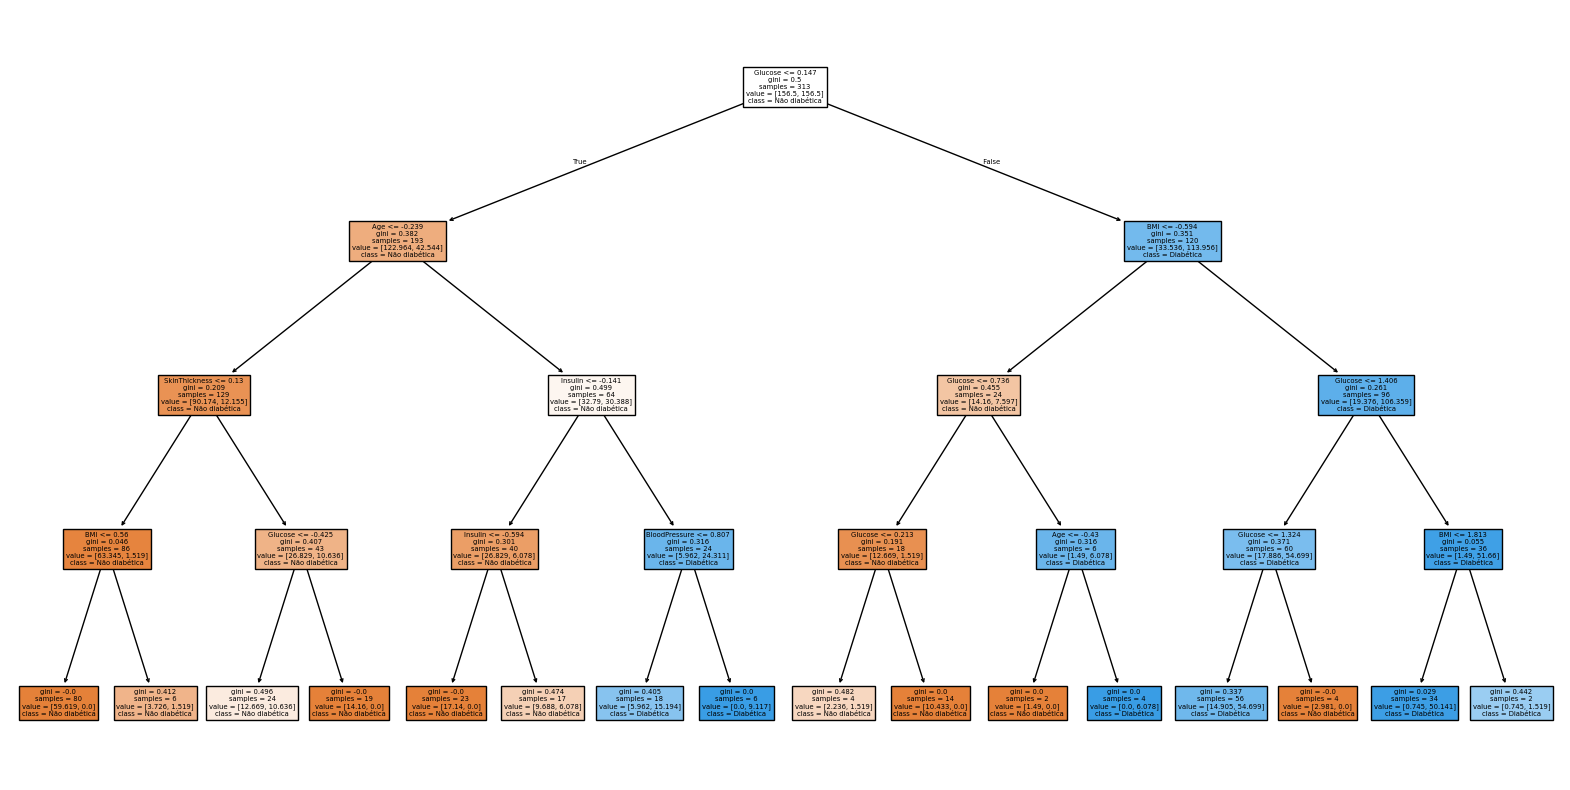

In [27]:
# Dando uma olhada na árvore com 4 ramificações que criamos:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(modelo_arvore, feature_names=X.columns, class_names=['Não diabética', 'Diabética'], filled=True)
plt.show()


In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Acurácia:", accuracy_score(y_teste, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_teste, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_teste, y_pred))


Acurácia: 0.7468354430379747

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80        52
           1       0.61      0.70      0.66        27

    accuracy                           0.75        79
   macro avg       0.72      0.74      0.73        79
weighted avg       0.76      0.75      0.75        79


Matriz de Confusão:
 [[40 12]
 [ 8 19]]


### Interpretação dos dados:

#### Acurácia:
0.7468 (ou 75%)
O modelo acerta 75% dos casos. É uma boa base, mas como há desbalanceamento nos dados, é importante olhar também para outras métricas.

### Matriz de Confusão:
|            | **Predito 0** | **Predito 1** |
| ---------- | ------------- | ------------- |
| **Real 0** | 40            | 12            |
| **Real 1** | 8             | 19            |

Verdadeiros negativos (TN): 40
Falsos positivos (FP): 12
Falsos negativos (FN): 8
Verdadeiros positivos (TP): 19

#### Interpretação detalhada:

##### Classe 0 (não diabético):
Precisão: 83% → quando o modelo disse "não é diabético", estava certo em 83% dos casos.
Recall: 77% → entre os que realmente não são diabéticos, o modelo acertou 77%.

##### Classe 1 (diabético):
Precisão: 61% → entre os que o modelo previu como diabéticos, 61% realmente eram.
Recall: 70% → entre os diabéticos reais, o modelo capturou 70%.

##### F1-Score:
É a média harmônica entre precisão e recall.
Classe 0: 0.80
Classe 1: 0.66

O modelo está melhor para a classe 0 (o que é esperado, pois ela tem mais exemplos no treino).

##### Considerações:
O modelo está equilibrado. O class_weight='balanced' ajudou bem.
O recall para a classe 1 (diabéticos) é 70%, o que é muito bom para um primeiro modelo.

Se o objetivo for detectar casos de diabetes com mais segurança, podermos tentar aumentar o recall da classe 1 (mesmo que à custa de precisão), pois é melhor um falso positivo do que um falso negativo nesse contexto. Ou treinar outro modelo:


## Treinando o modelo RandonForestClassifier:

A idéia é comparar se haverá melhora no desempenho com relação ao DecisionTreeClassifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(random_state=42, class_weight='balanced')
modelo_rf.fit(X_treino, y_treino)

y_pred_rf = modelo_rf.predict(X_teste)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Acurácia:', accuracy_score(y_teste, y_pred_rf))
print('\nRelatório de Classificação:\n', classification_report(y_teste, y_pred_rf))

print('\nMatriz de Confusão:\n', confusion_matrix(y_teste, y_pred_rf))


Acurácia: 0.7468354430379747

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82        52
           1       0.67      0.52      0.58        27

    accuracy                           0.75        79
   macro avg       0.72      0.69      0.70        79
weighted avg       0.74      0.75      0.74        79


Matriz de Confusão:
 [[45  7]
 [13 14]]


In [31]:
# Testando alguns hiperparâmetros:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Dicionário de hiperparâmetros a serem testados
param_grid = {
    'n_estimators': [50, 100, 200],  # número de árvores da floresta
    'max_depth': [4, 6, 8, None],    # limita quantos níveis cada árvore pode ter
    'min_samples_split': [2, 5, 10], # Define o mínimo de amostras necessário para que um nó possa ser dividido. Valores maiores deixam as árvores menos profundas e mais generalistas, reduzindo overfitting.
    'min_samples_leaf': [1, 2, 4],   # Controla o mínimo de dados que um nó final (folha) precisa conter.
    'class_weight': ['balanced']     # Corrige o desequilíbrio entre classes automaticamente com base na frequência. Essencial quando, por exemplo, temos muitos mais casos negativos (não diabéticos) do que positivos.
}

# Modelo base
rf = RandomForestClassifier(random_state=42)

# GridSearchCV com validação cruzada de 5 folds
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Treina o GridSearch com os dados já padronizados
grid_search.fit(X_treino_scaled, y_treino)

# Exibe os melhores parâmetros encontrados
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

# Avalia no conjunto de teste
melhor_modelo = grid_search.best_estimator_
y_pred = melhor_modelo.predict(X_teste_scaled)

# Métricas
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("\nAcurácia:", accuracy_score(y_teste, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_teste, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_teste, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Melhores parâmetros encontrados:
{'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Acurácia: 0.7468354430379747

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82        52
           1       0.67      0.52      0.58        27

    accuracy                           0.75        79
   macro avg       0.72      0.69      0.70        79
weighted avg       0.74      0.75      0.74        79


Matriz de Confusão:
 [[45  7]
 [13 14]]


### Comparativo de Modelos: RandomForest vs DecisionTreeClassifier

#### Acurácia
Ambos os modelos apresentaram **acurácia de 0.7468 (≈ 75%)**, acertando cerca de 3 a cada 4 previsões.  
Entretanto, os detalhes por classe revelam diferenças importantes na forma como cada modelo comete erros.

---

#### Matrizes de Confusão

#### 🟢 RandomForest

|                 | **Predito: Não diabético (0)** | **Predito: Diabético (1)** |
|-----------------|-------------------------------|----------------------------|
| **Real: Não**   | 45 (TN)                        | 7 (FP)                     |
| **Real: Sim**   | 13 (FN)                        | 14 (TP)                    |

#### 🟠 DecisionTreeClassifier

|                 | **Predito: Não diabético (0)** | **Predito: Diabético (1)** |
|-----------------|-------------------------------|----------------------------|
| **Real: Não**   | 40 (TN)                        | 12 (FP)                    |
| **Real: Sim**   | 8 (FN)                         | 19 (TP)                    |

---

###  Relatórios de Classificação

####  RandomForest

**Classe 0 (Não diabético):**
- Precisão: 78%
- Recall: 87%
- F1-Score: 82%

**Classe 1 (Diabético):**
- Precisão: 67%
- Recall: 52%
- F1-Score: 58%

---

####  DecisionTreeClassifier

**Classe 0 (Não diabético):**
- Precisão: 83%
- Recall: 77%
- F1-Score: 80%

**Classe 1 (Diabético):**
- Precisão: 61%
- Recall: 70%
- F1-Score: 66%

---

### Comparação Direta

| Métrica               | RandomForest | DecisionTree |
|-----------------------|--------------|---------------|
| **Precisão Classe 1** | 67%          | 61%           |
| **Recall Classe 1**   | 52%          | 70%           |
| **F1-Score Classe 1** | 58%          | 66%           |

---

### Conclusão

- O **RandomForest** adota uma postura **mais conservadora**, só "acusa" diabetes quando está mais certo disso.  
  Isso melhora a **precisão**, mas pode deixar passar alguns casos reais (menor recall).

- O **DecisionTreeClassifier** é **mais sensível**, detectando mais casos reais de diabetes (maior recall),  
  mesmo que isso gere mais alarmes falsos (menor precisão).

###  Ponderações:
Se o objetivo for **não deixar passar casos reais de diabetes** (alta sensibilidade),  
o **DecisionTree** pode ser mais indicado.

Se o objetivo for **evitar falsos positivos** e só alertar com mais certeza,  
o **RandomForest** oferece **maior precisão**.

In [32]:
# Obtem as probabilidades da classe 1 (diabéticos)
y_prob = melhor_modelo.predict_proba(X_teste_scaled)[:, 1]


In [33]:
# Testando diferentes threshold para ver onde fica o melhor equiíbrio de precisão x recall

from sklearn.metrics import classification_report, confusion_matrix

def avaliar_threshold(thresh):
    y_pred_thresh = (y_prob >= thresh).astype(int)

    print(f"\n--- Threshold = {thresh} ---")
    print("Matriz de Confusão:")
    print(confusion_matrix(y_teste, y_pred_thresh))
    print("\nRelatório de Classificação:")
    print(classification_report(y_teste, y_pred_thresh, digits=3))


In [34]:
for thresh in [0.50, 0.45, 0.40, 0.35, 0.30]:
    avaliar_threshold(thresh)


--- Threshold = 0.5 ---
Matriz de Confusão:
[[45  7]
 [13 14]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0      0.776     0.865     0.818        52
           1      0.667     0.519     0.583        27

    accuracy                          0.747        79
   macro avg      0.721     0.692     0.701        79
weighted avg      0.739     0.747     0.738        79


--- Threshold = 0.45 ---
Matriz de Confusão:
[[45  7]
 [10 17]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0      0.818     0.865     0.841        52
           1      0.708     0.630     0.667        27

    accuracy                          0.785        79
   macro avg      0.763     0.748     0.754        79
weighted avg      0.781     0.785     0.781        79


--- Threshold = 0.4 ---
Matriz de Confusão:
[[42 10]
 [ 7 20]]

Relatório de Classificação:
              precision    recall  f1-score   support

           

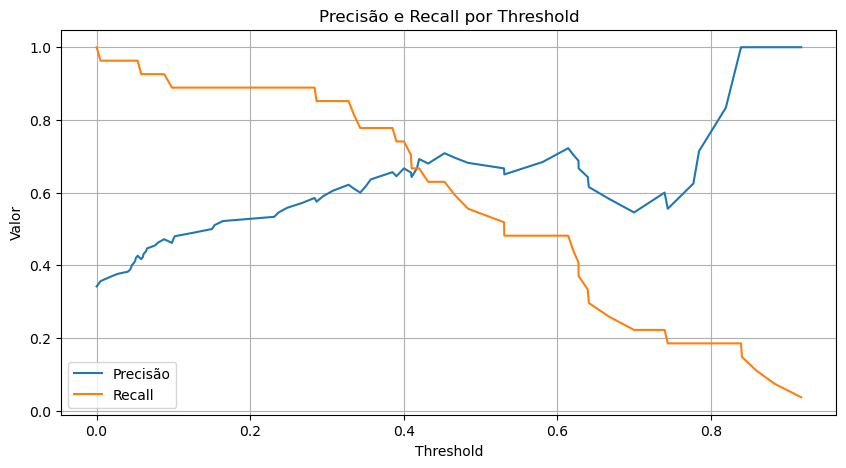

In [35]:
# Imprimindo a relação de Precisão x Recall nos diferentes thresholds

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precisao, recall, thresholds = precision_recall_curve(y_teste, y_prob)

plt.figure(figsize=(10, 5))
plt.plot(thresholds, precisao[:-1], label='Precisão')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Valor')
plt.title('Precisão e Recall por Threshold')
plt.legend()
plt.grid(True)
plt.show()


### Explicando o Threshold e a Acurácia do Modelo
#### Objetivo do Modelo
O objetivo deste modelo preditivo é estimar com o maior grau de veracidade possível se um paciente apresenta indicativos de diabetes, com base em dados clínicos previamente coletados.

Embora a precisão e o recall sejam importantes, o foco principal é obter uma boa acurácia geral, que reflita um equilíbrio entre não gerar alarmes falsos e não deixar de identificar casos relevantes.

#### Sobre a escolha do Threshold (limiar de decisão)
O modelo de classificação atribui a cada pessoa uma probabilidade de ser diabética. O limiar padrão para classificar alguém como “positivo” (diabético) é 50%. No entanto, para este projeto, utilizando o RandomForest, adotamos um threshold de 43%.

Isso significa que:
Se a probabilidade predita for igual ou maior que 43%, o paciente será classificado como “possivelmente diabético”.
Essa escolha busca equilibrar a precisão (evitar falsos alarmes) com o recall (detectar corretamente casos reais).

#### Justificativa estatística
No ponto de 43%, o modelo atinge um equilíbrio relevante entre:
Precisão ≈ Recall
Acurácia global ≈ 77%
F1-score da classe positiva (diabético): 0.679
Optar por esse threshold permite uma comunicação clara:

"Com base em dados clínicos, este modelo aponta risco elevado de diabetes quando a chance estimada for igual ou superior a 43%. Essa decisão é apoiada por métricas de desempenho que equilibram o risco de alarmes falsos e o de omissões."

#### Importante:
Este modelo não substitui diagnóstico médico. Ele pode servir como ferramenta auxiliar para triagem inicial, orientação de exames ou tomada de decisão preventiva. O uso responsável exige sempre interpretação conjunta com profissionais da saúde.

### Detectando se houve overfiting nos dados de treino:

In [36]:
# Olhando o resultado do aprendizado de máquina sobre os dados de treino também, para ver se houve overfiting.

# Predição nos dados de treino
y_pred_treino = melhor_modelo.predict(X_treino_scaled)

# Relatório de classificação
print("== Desempenho no CONJUNTO DE TREINO ==")
print("\nMatriz de Confusão:")
print(confusion_matrix(y_treino, y_pred_treino))

print("\nRelatório de Classificação:")
print(classification_report(y_treino, y_pred_treino, digits=3))

== Desempenho no CONJUNTO DE TREINO ==

Matriz de Confusão:
[[209   1]
 [  2 101]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0      0.991     0.995     0.993       210
           1      0.990     0.981     0.985       103

    accuracy                          0.990       313
   macro avg      0.990     0.988     0.989       313
weighted avg      0.990     0.990     0.990       313



#### Conclusão sobre o desempenho nos dados de treino x dados de teste:
- O modelo apresentou **desempenho quase perfeito nos dados de treino**, o que **pode indicar overfitting**.
- No entanto, o desempenho no **conjunto de teste é semelhante ao da DecisionTree**, indicando que **a generalização ainda é razoável**.
- O uso de `class_weight='balanced'` continua essencial para lidar com o desbalanceamento da base.
- A alta discrepância entre treino e teste sugere que o modelo poderia ser **regularizado melhor** para evitar aprendizado excessivamente específico do conjunto de treino. Entretanto, muito dificilmente conseguiriamos melhores resultados sobre o conjunto de teste, visto que mesmo com um desempenho absurdamente excelente nos dados de treino, o melhor desempenho nos dados de teste é praticamente igual nos dois algorítimos.
- Mesmo com overfitting, o desempenho no teste é semelhante ao do modelo mais simples (DecisionTree)
Isso indica que o limite de aprendizado do modelo com os dados disponíveis já foi atingido. Ou seja, mesmo que o modelo seja mais complexo, ele não consegue extrair mais informações úteis para generalizar melhor.
- Regularizar o RandomForest pode reduzir overfitting, mas dificilmente vai melhorar muito a performance no teste
Ao aplicar regularização (como limitar max_depth, min_samples_leaf, etc.), o modelo provavelmente vai perder desempenho no treino e ficar mais parecido com a árvore simples, sem trazer ganho real no teste. <br><br>


### Justificativa da Escolha do Modelo Final

Após comparar os modelos treinados, optei por adotar o **DecisionTreeClassifier** como modelo final para predição de diabetes, com os seguintes fundamentos:

1. **Maior equilíbrio entre desempenho no treino e no teste**  
   - A acurácia nos dados de treino foi de **86%**, e no teste de **74,7%**, uma diferença aceitável e indicativa de **boa generalização**.  
   - O modelo RandomForest, embora tenha apresentado acurácia de **99% no treino**, caiu para **74% no teste**, o que sugere **overfitting**.

2. **Melhor desempenho na identificação da classe positiva (diabéticos)**  
   - O **recall da classe 1** (diabetes) no DecisionTree foi de **70% no teste**, o que representa uma boa taxa de detecção de casos positivos.  
   - Este é o principal objetivo do modelo: **identificar corretamente indivíduos com possível diabetes**, mesmo que isso implique em alguns falsos positivos.

3. **Modelo mais simples, direto e sem necessidade de ajustes de threshold**  
   - O modelo RandomForest, para se aproximar de um desempenho semelhante, exigiria **ajustes manuais de threshold**, o que **aumenta a complexidade operacional**.  
   - O DecisionTree já atinge **bons resultados sem essa necessidade**, sendo, portanto, **mais prático e transparente** para uso em ambiente de produção ou avaliação.


In [37]:
# Salva o modelo treinado:

# Optando pelo modelo do algoritimo DecisionTreeClassifier, pois apresenta mais equilibrio na relação treino x teste (sem overfitting) e melhor desempenho
# no resultado positivo para diabetes, que é o objetivo deste modelo, sem necessidade de ajuste de Threshold para melhorar esta relação, como foi o caso
# do modelo RandomForest.

import joblib

joblib.dump(modelo_arvore, 'modelos/modelo_decision_tree_classifier.pkl')

['modelos/modelo_decision_tree_classifier.pkl']

In [38]:
# Salva o scaler treinado

import joblib

joblib.dump(scaler, 'modelos/scaler_standard.pkl')


['modelos/scaler_standard.pkl']